In [1]:
import pandas as pd

In [2]:
dfGames= pd.read_parquet("./Data/lichess-sampled.parquet")
dfGames.head(3)

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04


In [4]:
dfWhiteElo = pd.DataFrame()
dfWhiteElo["ELO"] = dfGames["WhiteElo"]
dfWhiteElo["Date"] = dfGames["Date"].dt.date
dfWhiteElo.head(3)

,ELO,Date
0,1654.0,2012-12-31
1,1824.0,2012-12-31
2,1463.0,2012-12-31


In [5]:
dfBlackElo = pd.DataFrame()
dfBlackElo["ELO"] = dfGames["BlackElo"]
dfBlackElo["Date"] = dfGames["Date"].dt.date
dfBlackElo.head(3)

,ELO,Date
0,1919.0,2012-12-31
1,1811.0,2012-12-31
2,1504.0,2012-12-31


In [6]:
dfElo = pd.concat([dfWhiteElo, dfBlackElo])
dfElo.head(3)

,ELO,Date
0,1654.0,2012-12-31
1,1824.0,2012-12-31
2,1463.0,2012-12-31


In [9]:
groupedElos = pd.pivot_table(dfElo, values="ELO", index="Date", aggfunc="mean")
groupedElos.head(3)

,ELO
Date,
2012-12-31,1630.125000
2013-01-01,1607.607143
2013-01-02,1583.902439


<AxesSubplot:xlabel='Date'>

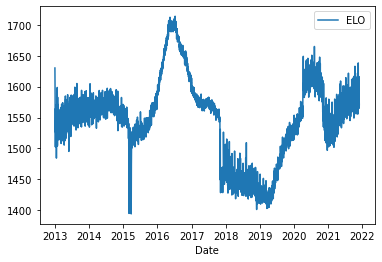

In [11]:
groupedElos.plot()

<AxesSubplot:xlabel='Date'>

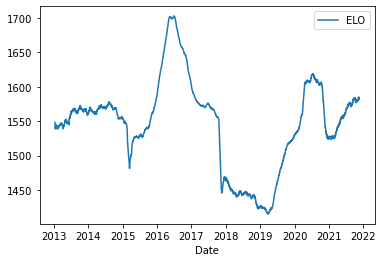

In [22]:
filteredElos = groupedElos.rolling(window=25, center=True).mean()
filteredElos.plot()